In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
spx_rkth2 = np.sqrt(data.query('Symbol==".AEX"').rk_th2.values)

In [6]:
nnet_model = ResNeuralNetVol(hiddenlayer=[])
roughvol_model = RoughVol(fit_period=200)

In [7]:
spx_rkth2.__len__()

5043

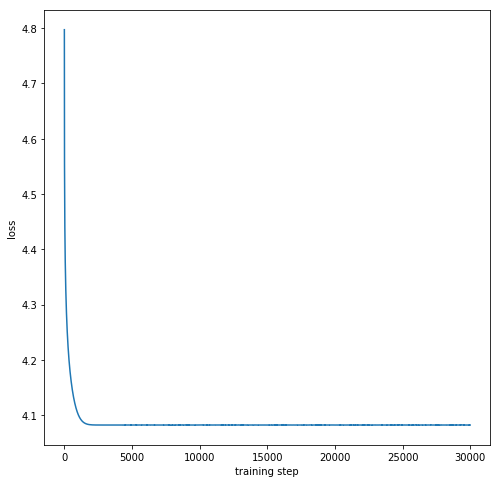

59.26588439941406

In [8]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [9]:
roughvol_model.fit(spx_rkth2[:3000])

0.14858075132789958

In [10]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00801687, 0.00840963, 0.00849147, ..., 0.0084882 , 0.00807182,
        0.00816989],
       [0.00852927, 0.0086413 , 0.00799833, ..., 0.00806102, 0.00815238,
        0.00750617],
       [0.00926344, 0.00844723, 0.00804905, ..., 0.0082732 , 0.00762948,
        0.00734708],
       ...,
       [0.01216535, 0.01156159, 0.01067224, ..., 0.00938923, 0.01134115,
        0.00956952],
       [0.01049698, 0.00981747, 0.01075885, ..., 0.01118135, 0.00943256,
        0.00890612],
       [0.01082487, 0.01167274, 0.0122048 , ..., 0.00962832, 0.00908784,
        0.01109412]])

In [11]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [12]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [13]:
spx_rkth2[3200:4000]

array([0.00843382, 0.00982736, 0.01205017, 0.01009978, 0.00687738,
       0.00846714, 0.00811546, 0.01771279, 0.00826701, 0.00654273,
       0.00672313, 0.00650905, 0.00630477, 0.00657978, 0.00706028,
       0.00605811, 0.00448297, 0.00430637, 0.00456107, 0.00487473,
       0.00474831, 0.00565389, 0.00666878, 0.00661066, 0.00570432,
       0.00615956, 0.00552225, 0.00565933, 0.00862979, 0.00627696,
       0.00672402, 0.00830528, 0.00927419, 0.00751224, 0.00514504,
       0.00607567, 0.00901907, 0.00516153, 0.00598005, 0.00506726,
       0.00615949, 0.00546625, 0.00597088, 0.00587746, 0.00473322,
       0.00537282, 0.00593204, 0.00665938, 0.00806252, 0.00802846,
       0.00755194, 0.00687787, 0.00788306, 0.00575941, 0.00500151,
       0.0073406 , 0.00589965, 0.00651096, 0.00674142, 0.00677035,
       0.00649797, 0.00574001, 0.00561321, 0.00583186, 0.00578477,
       0.00798163, 0.00785536, 0.00713126, 0.00758284, 0.00513399,
       0.00507938, 0.00668048, 0.00597768, 0.00633431, 0.00525

In [14]:
roughvol_result.shape,  nnet_result.shape

((801, 100), (801, 100))

In [15]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [16]:
true_result.shape

(801, 101)

In [17]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

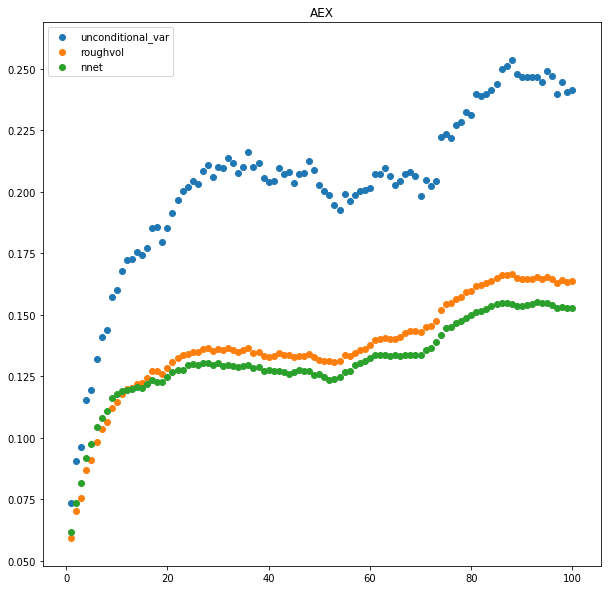

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.title("AEX")
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [19]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

array([0.05920122, 0.07021003, 0.07569251, 0.08678302, 0.09103793,
       0.09840856, 0.1034599 , 0.10654464, 0.11221701, 0.11438481,
       0.11789045, 0.11980368, 0.12042254, 0.12178288, 0.12214554,
       0.12420099, 0.1270994 , 0.12722948, 0.12607716, 0.1284253 ,
       0.13079186, 0.13253358, 0.13359135, 0.13417616, 0.13482317,
       0.13468562, 0.13608019, 0.1364388 , 0.13509335, 0.13603343,
       0.13577141, 0.13654209, 0.13582229, 0.13484085, 0.13547976,
       0.13636395, 0.1346291 , 0.1348409 , 0.13322073, 0.13291608,
       0.13304804, 0.13424588, 0.13346984, 0.13361865, 0.13267151,
       0.13341086, 0.13327881, 0.13405645, 0.13281548, 0.1316385 ,
       0.13131351, 0.13124344, 0.13073449, 0.13117595, 0.13344499,
       0.13328247, 0.13458342, 0.13550333, 0.13619337, 0.13775792,
       0.13953141, 0.13994812, 0.14065081, 0.14014354, 0.13997954,
       0.14108274, 0.14247618, 0.14320972, 0.14337242, 0.14277629,
       0.1449748 , 0.14548911, 0.1473719 , 0.15172277, 0.15433

In [20]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)

array([0.06161905, 0.0737142 , 0.08165204, 0.09174427, 0.09729711,
       0.10421961, 0.10805056, 0.11105236, 0.11626685, 0.11774441,
       0.1190755 , 0.11953829, 0.11965536, 0.12070575, 0.12026683,
       0.12181567, 0.12340967, 0.1225421 , 0.12279928, 0.12476396,
       0.12659562, 0.127427  , 0.12769719, 0.12946697, 0.13012448,
       0.12948283, 0.13030445, 0.13047775, 0.12955135, 0.13018333,
       0.12915204, 0.129498  , 0.12909572, 0.12886226, 0.12932357,
       0.12945156, 0.12845512, 0.12871089, 0.12723119, 0.12753797,
       0.12727045, 0.12711929, 0.12656168, 0.12606988, 0.12670965,
       0.12754327, 0.127209  , 0.1269931 , 0.12556407, 0.12582174,
       0.12478376, 0.12353783, 0.12368368, 0.12451149, 0.12654599,
       0.12733364, 0.12956119, 0.1302414 , 0.1312433 , 0.13247871,
       0.13381305, 0.13376758, 0.13371413, 0.13341849, 0.13363293,
       0.13340002, 0.13380124, 0.13375684, 0.13382575, 0.13362918,
       0.13568886, 0.13662158, 0.13874711, 0.14194778, 0.14441